In [3]:
SCOPETYPE     = 'OPENADC'
PLATFORM      = 'CWLITEARM'
CRYPTO_TARGET = 'TINYAES128C'
SS_VER        = 'SS_VER_1_1'

In [2]:
%run "Setup_Scripts/Setup_Generic.ipynb"

(ChipWhisperer NAEUSB WARNING|File naeusb.py:799) Your firmware (0.62) is outdated - latest is 0.65 See https://chipwhisperer.readthedocs.io/en/latest/firmware.html for more information


INFO: Found ChipWhisperer😍
scope.gain.mode                          changed from low                       to high                     
scope.gain.gain                          changed from 0                         to 30                       
scope.gain.db                            changed from 5.5                       to 24.8359375               
scope.adc.basic_mode                     changed from low                       to rising_edge              
scope.adc.samples                        changed from 24400                     to 5000                     
scope.adc.trig_count                     changed from 7087577                   to 28869487                 
scope.clock.adc_src                      changed from clkgen_x1                 to clkgen_x4                
scope.clock.adc_freq                     changed from 0                         to 374988281                
scope.clock.adc_rate                     changed from 0.0                       to 374988281.0       

In [4]:
%%bash -s "$PLATFORM" "$CRYPTO_TARGET" "$SS_VER"
cd ../hardware/victims/firmware/simpleserial-blowfish
make PLATFORM=$1 CRYPTO_TARGET=NONE SS_VER=$3 -j
#make clean

SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
make[1]: '.dep' is up to date.
SS_VER set to SS_VER_1_1
SS_VER set to SS_VER_1_1
.
Welcome to another exciting ChipWhisperer target build!!
arm-none-eabi-gcc (Arch Repository) 13.2.0
Copyright (C) 2023 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

.
Assembling: .././hal/stm32f3/stm32f3_startup.S
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -x assembler-with-cpp -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -DF_CPU=7372800 -Wa,-gstabs,-adhlns=objdir-CWLITEARM/stm32f3_startup.lst -I.././simpleserial/ -I.././hal -I.././hal/stm32f3 -I.././hal/stm32f3/CMSIS -I.././hal/stm32f3/CMSIS/core -I.././hal/stm32f3/CMSIS/device -I.././hal/stm32f4/Legacy -I.././simpleserial/ -I.././crypto/ .././hal/stm32f3/stm32f3_startup.S -o objdir-CWLITEARM/stm32f3_sta

/usr/lib/gcc/arm-none-eabi/13.2.0/../../../../arm-none-eabi/bin/ld: /usr/lib/gcc/arm-none-eabi/13.2.0/../../../../arm-none-eabi/lib/thumb/v7e-m/nofp/libg_nano.a(libc_a-closer.o): in function `_close_r':
/build/arm-none-eabi-newlib/src/build-nano/arm-none-eabi/thumb/v7e-m/nofp/newlib/../../../../../../newlib-4.3.0.20230120/newlib/libc/reent/closer.c:47:(.text._close_r+0xc): warning: _close is not implemented and will always fail
/usr/lib/gcc/arm-none-eabi/13.2.0/../../../../arm-none-eabi/bin/ld: /usr/lib/gcc/arm-none-eabi/13.2.0/../../../../arm-none-eabi/lib/thumb/v7e-m/nofp/libg_nano.a(libc_a-lseekr.o): in function `_lseek_r':
/build/arm-none-eabi-newlib/src/build-nano/arm-none-eabi/thumb/v7e-m/nofp/newlib/../../../../../../newlib-4.3.0.20230120/newlib/libc/reent/lseekr.c:49:(.text._lseek_r+0x10): warning: _lseek is not implemented and will always fail
/usr/lib/gcc/arm-none-eabi/13.2.0/../../../../arm-none-eabi/bin/ld: /usr/lib/gcc/arm-none-eabi/13.2.0/../../../../arm-none-eabi/lib/thu

.
Creating load file for EEPROM: simpleserial-blowfish-CWLITEARM.eep
arm-none-eabi-objcopy -j .eeprom --set-section-flags=.eeprom="alloc,load" \
--change-section-lma .eeprom=0 --no-change-warnings -O ihex simpleserial-blowfish-CWLITEARM.elf simpleserial-blowfish-CWLITEARM.eep || exit 0
.
Creating load file for Flash: simpleserial-blowfish-CWLITEARM.hex
arm-none-eabi-objcopy -O ihex -R .eeprom -R .fuse -R .lock -R .signature simpleserial-blowfish-CWLITEARM.elf simpleserial-blowfish-CWLITEARM.hex
.
Creating load file for Flash: simpleserial-blowfish-CWLITEARM.bin
arm-none-eabi-objcopy -O binary -R .eeprom -R .fuse -R .lock -R .signature simpleserial-blowfish-CWLITEARM.elf simpleserial-blowfish-CWLITEARM.bin
.
Creating Extended Listing: simpleserial-blowfish-CWLITEARM.lss
arm-none-eabi-objdump -h -S -z simpleserial-blowfish-CWLITEARM.elf > simpleserial-blowfish-CWLITEARM.lss
.
Creating Symbol Table: simpleserial-blowfish-CWLITEARM.sym
arm-none-eabi-nm -n simpleserial-blowfish-CWLITEARM.el

In [6]:
cw.program_target(scope, prog, "../hardware/victims/firmware/simpleserial-blowfish/simpleserial-blowfish-{}.hex".format(PLATFORM))

Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 11563 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 11563 bytes


In [7]:
import subprocess
args = ("/usr/bin/gcc", "/home/simon/blowfish/blowfish/blowfish.c", "/home/simon/blowfish/blowfish/main.c", "-o", "/home/simon/blowfish/blowfish/blowfish", "-lm")
rc = subprocess.call(args)
if rc != 0:
    print("Error compiling Blowfish")

In [45]:
NO_OF_PLAINTEXTS = 500
ATTACK_F = False  # whether we are attacking the result of f()

In [46]:
import random

plaintexts = []
if ATTACK_F:
    # in this case, the right half of the plaintext are the first 32 bits
    # insert the left half of one plaintext here and generate new right halves
    left = [42, 64, 123, 85]
    for _ in range(NO_OF_PLAINTEXTS):
        right = [random.randint(0, 255) for _ in range(4)]
        right.extend(left)
        plaintexts.append(right)
else:
    plaintexts = [[random.randint(0, 255) for _ in range(8)] for _ in range(NO_OF_PLAINTEXTS)]

In [47]:
# get Hamming Weights
import numpy as np
import subprocess

hw_array = []
        
blowfish_arg = "feistel" if ATTACK_F else "sbox"
# when using the XOR attack
blowfish_arg = "feistel" if ATTACK_F else "xor"

for p in plaintexts:
    args = ("/home/simon/blowfish/blowfish/blowfish", blowfish_arg,
            str(p[0]), str(p[1]), str(p[2]), str(p[3]), str(p[4]), str(p[5]), str(p[6]), str(p[7]))
    result = subprocess.run(args, capture_output=True)
    hw = [int(i) for i in result.stdout.decode().split()]
    hw_array.append(hw)

hw_array = np.array(hw_array)

In [48]:
scope.adc.samples = 4200
# discards the first 500 samples
#scope.adc.offset = 2500
#scope.adc.decimate = 10

In [49]:
from tqdm.notebook import trange
import numpy as np
import time

trace_array = []
for i in trange(NO_OF_PLAINTEXTS, desc='Capturing traces'):
    scope.arm()
    
    target.simpleserial_write('p', bytearray(plaintexts[i]))
    
    ret = scope.capture()
    if ret:
        print("Target timed out!")
        continue
    
    response = target.simpleserial_read('r', 8)
    #print(plaintexts[i], "\t", ["%02X" % i for i in response])
    
    trace_array.append(scope.get_last_trace())

trace_array = np.array(trace_array)

Capturing traces:   0%|          | 0/500 [00:00<?, ?it/s]

In [50]:
all_corrs = []

for i in range(256):
    corr = []
    for j in range(scope.adc.samples):
        trace_sample = trace_array[:, j]
        hw_sample = hw_array[:, i]

        pearson_corr = np.corrcoef(trace_sample, hw_sample)
        corr.append(abs(pearson_corr[0, 1]))
    all_corrs.append(corr)

all_corrs = np.array(all_corrs)
#all_corrs = np.transpose(all_corrs)

print("Done")

Done


In [51]:
# get the value with the highest correlation
key_guess = np.where(all_corrs == np.amax(all_corrs))

print("Keyguess %d (0x%X), index %d" % (key_guess[0][0], key_guess[0][0], key_guess[1][0]))

# when attacking XOR
print("Keyguesses: %d (0x%X) or %d (0x%X)" % (key_guess[0][0], key_guess[0][0], 255-key_guess[0][0], 255-key_guess[0][0]))

Keyguess 117 (0x75), index 197
Keyguesses: 117 (0x75) or 138 (0x8A)


<IPython.core.display.Javascript object>


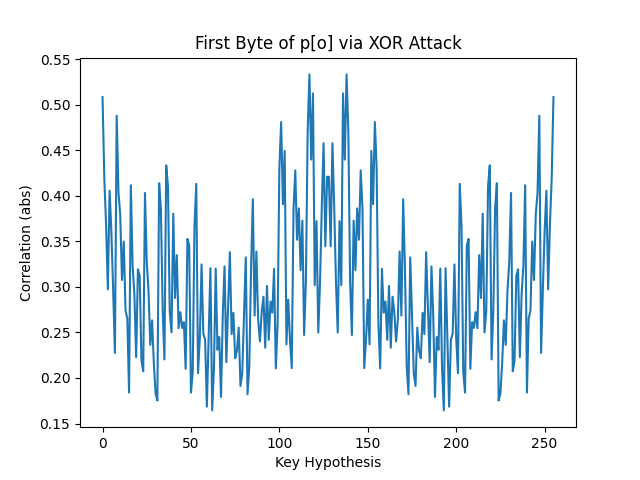

In [52]:
%matplotlib notebook
import matplotlib.pylab as plt

#plt.plot(trace_array[0])
plt.plot(np.max(all_corrs.T, axis=0))
plt.ylabel("Correlation (abs)")
plt.xlabel("Key Hypothesis")
plt.title("First Byte of p[o] via XOR Attack")

plt.show()

In [ ]:
np.max(all_corrs.T, axis=0)[134]

In [ ]:
np.max(all_corrs.T, axis=0)[158]

In [53]:
scope.dis()
target.dis()